# Loading a pickled file

Tenemos ciertos tipos de datos que no pueden ser guardados en ficheros planos, por ejemplo listas y diccionarios. Si deseamos guardar este tipo de estructuras de datos, en ficheros que pueden ser leídos por las personas, debemos de hacer uso por ejemplo de los ficheros JSON, que son apropiados para guardar diccionarios.  Sin embargo, si nosotros lo único que queremos es ser capaces de importar estos datos en Python, podemos convertir nuestro objeto en una secuencia de bytes. Python dispone de los ficheros tipo **pickle** que lo que hacen es los indicado.

In [1]:
#Importamos la librería
import pickle

#Abrimos el fichero 
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Listing sheets in Excel files

A continuación aprenderemos a importar datos en hojas Excel haciendo uso de la librería pandas. Como bien sabemos un hoja excel puede estar compuesta de una o varias hojas. Por lo tanto, antes de importar datos debemos de saber el número de hojas de las que dispone nuestro fichero excel.

In [2]:
import pandas as pd

#Cargamos la hoja excel
xlsx = pd.ExcelFile("battledeath.xlsx")

#Mostramos las hojas de las que dispone nuestra hoja excel
print(xlsx.sheet_names)

['2002', '2004']


# Importing sheets from Excel files

Una vez ya conocema la estructura de nuestro fichero Excel, es decir, conocemos el número de hojas que tiene, ya estamos preparados para importar aquellas hojas que sean de nuestro interés. 

In [4]:
#Importamos la hoja de 2002
df_2002 = xlsx.parse("2002")

#Vemos las 3 primeras observaciones
print(df_2002.head(3))

  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120


In [5]:
#Cargamos la hoja de 2004
df_2004 = xlsx.parse("2004")

#Vemos las 3 primeras observaciones
print(df_2004.head(3))

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277


# Customizing your spreadsheet import

La función **parse()** dispone de una serie de parámetros adicionales que nos permiten importar los datos de una forma más personalizada. Además de por nombre de la hoja, también podemos acceder a la posición.

In [7]:
#Parseamos la primera de las hojas
df1 = xlsx.parse(0, skiprows = [0], names = ['Country', 'AMM due to War (2002)'])

#Mostramos el resultado
print(df1.head())

               Country  AMM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


In [9]:
#Parseamos la segunda de las hojas
df2 = xlsx.parse(1, skiprows = [0], parse_cols = [0], names = ['Country'])

#Mostramos el resultado
print(df2.head())

               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


# Importing SAS files

A continuación veremos como importar ficheros **SAS** a DataFrame haciendo uso de Python. 

In [17]:
#Importamos las librerías necesarias
import pandas as pd
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt

#Importamos los datos
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

#Mostramos el resultado
print(df_sas.head())

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


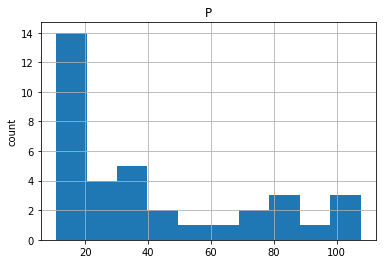

In [18]:
#Visualizamos los datos mediante un histograma
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

# Importing Stata files

La librería pandas dispone de la función **read_stata()** que nos permite importar ficheros stata de una manera sencilla y simple.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#Hacemos uso de read_stata para importar datos
df = pd.read_stata('disarea.dta')

#Mostramos los resultados
print(df.head(3))

  wbcode      country  disa1  disa2  disa3  disa4  disa5  disa6  disa7  disa8  \
0    AFG  Afghanistan   0.00   0.00   0.76   0.73    0.0    0.0   0.00    0.0   
1    AGO       Angola   0.32   0.02   0.56   0.00    0.0    0.0   0.56    0.0   
2    ALB      Albania   0.00   0.00   0.02   0.00    0.0    0.0   0.00    0.0   

    ...    disa16  disa17  disa18  disa19  disa20  disa21  disa22  disa23  \
0   ...       0.0     0.0     0.0    0.00     0.0     0.0    0.00    0.02   
1   ...       0.0     0.4     0.0    0.61     0.0     0.0    0.99    0.98   
2   ...       0.0     0.0     0.0    0.00     0.0     0.0    0.00    0.00   

   disa24  disa25  
0    0.00    0.00  
1    0.61    0.00  
2    0.00    0.16  

[3 rows x 27 columns]


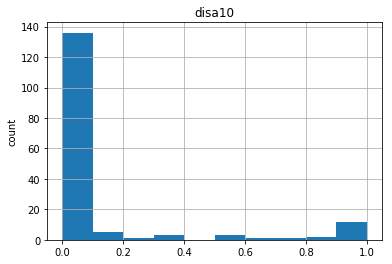

In [20]:
#Visualizamos los resultados
pd.DataFrame.hist(df[['disa10']])
plt.ylabel('count')
plt.show()

# Using h5py to import HDF5 files

A la hora de importar datos de ficheros HDF5, Python dispone de la librería **h5py**. 

In [5]:
#Importamos las librerías 
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

#Cargamos el fichero
file = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'
data = h5py.File(file, 'r')

#Vemos el tipo de datos
print(type(data))

<class 'h5py._hl.files.File'>


In [3]:
#Obtenemos las claves del fichero
for key in data.keys():
    print(key)

meta
quality
strain


# Extracting data from your HDF5 file

A continuación vamos a proceder a extraer los datos de nuestro fichero y a visualizarlos.

In [4]:
#Obtenemos el grupo de nuestro fichero
group = data['strain']

#Vemos las claves de nuestro grupo
for key in group.keys():
    print(key)

Strain


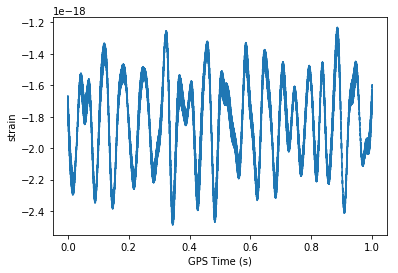

In [8]:
#Obtenemos los valores
strain = data['strain']['Strain'].value

#Seleccionamos el número de muestra que queremos importar
n_samples = 10000

#Generamos un vector de tiempos 
time = np.arange(0, 1, 1/n_samples)

#Visualizamos el resultado
plt.plot(time, strain[:n_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

# Loading .mat files

Python también nos permite cargar ficheros **matlab**, estos ficheros tiene extensión **.mat**.

In [10]:
#Importamos la librería para importar los ficheros de matlab
import scipy.io

#Cargamos los datos del fichero
mat = scipy.io.loadmat('ja_data2.mat')

#Vemos el tipo de dato generado
print(type(mat))

<class 'dict'>


# The structure of .mat in Python

Como podemos ver lo que tenemos es un diccionario. Cada elemento de este diccionario se corresponde con una variable del espacio de trabajo de matlab, por lo tanto, cada una de las claves de nuestro diccionario corresponde con el nombre de la variable y el el valor de nuestro diccionario es el valor de dicha variable.

In [14]:
#Vemos las distintas variables que dispone nuestro fichero
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [15]:
#Procemos a seleccionar una de las variables y ver su tipo 
print(type(mat['CYratioCyt']))

<class 'numpy.ndarray'>


In [16]:
#Vemos el tamaño de nuestra array
print(mat['CYratioCyt'].shape)

(200, 137)


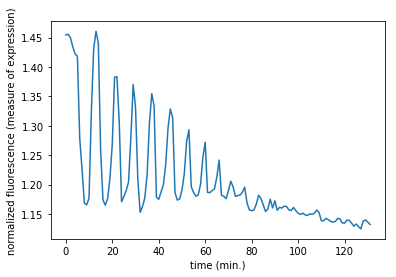

In [17]:
#Procedemos a visualizar los datos
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()